In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.stats as stats
from PIL import Image
from scipy.stats import multivariate_normal
%matplotlib inline


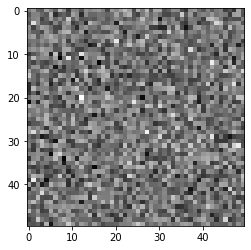

In [2]:
## 1 (a) ##

mean, deviation = 3, 7 # mean and standard deviation
s = np.random.normal(mean, deviation, 2500)
im = s.reshape(50, 50)
plt.gray()
plt.imshow(im)
# im = Image.fromarray(s)
# plt.gray()
# plt.imshow(im)

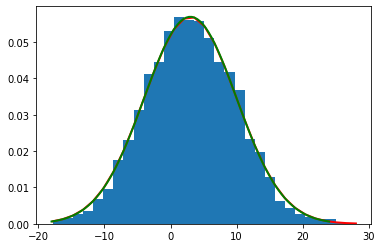

In [3]:
## 1 (b) ##

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(deviation * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mean)**2 / (2 * deviation**2) ),
         linewidth=2, color='r')
x = np.linspace(mean - 3*deviation, mean + 3*deviation, 100)
plt.plot(x, stats.norm.pdf(x, mean, deviation), linewidth=2, color='g')


plt.plot()
plt.show()

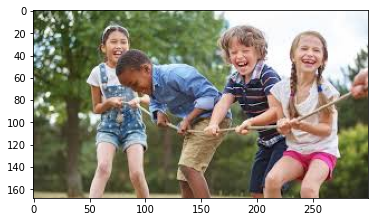

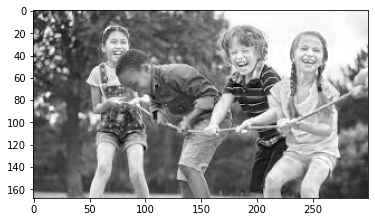

In [4]:
## 1 (c) ##


# Reading the image

image = cv2.imread('kids.jpg', )

# Display original colored imaged
b,g,r = cv2.split(image)
img = cv2.merge((r,g,b))
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()


# Display grayscaled image
plt.figure()
plt.imshow(image[:,:,2], cmap='gray')
plt.show()


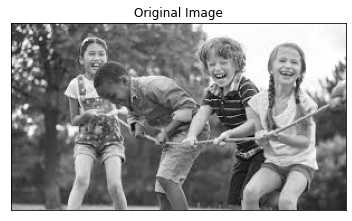

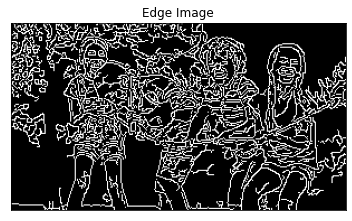

In [12]:
## 1 (d) ##


img = cv2.imread('kids.jpg',0)

# Apllying the Canny algorithm on the image
edges = cv2.Canny(img,50,200)

# Visualizing
plt.plot,plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()


plt.plot,plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

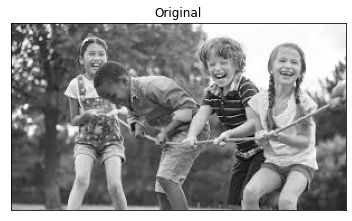

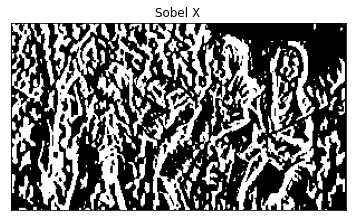

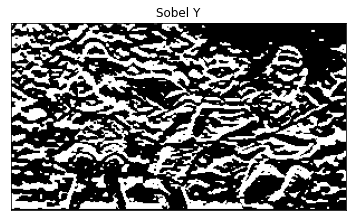

In [8]:
## 1 (d) ##


scale = 1
delta = 0

# Apllying the Sobel operator on the image, by the 2 and y scale
sobelx = cv2.Sobel(img,cv2.CV_16S,1,0,ksize=5, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
sobely = cv2.Sobel(img,cv2.CV_16S,0,1,ksize=5, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

# Definig threshold for the image
ret,sobelx = cv2.threshold(sobelx,127,255,cv2.THRESH_BINARY)
ret,sobely = cv2.threshold(sobely,127,255,cv2.THRESH_BINARY)

# Visualizing
plt.plot,plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

plt.plot,plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

plt.plot,plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()


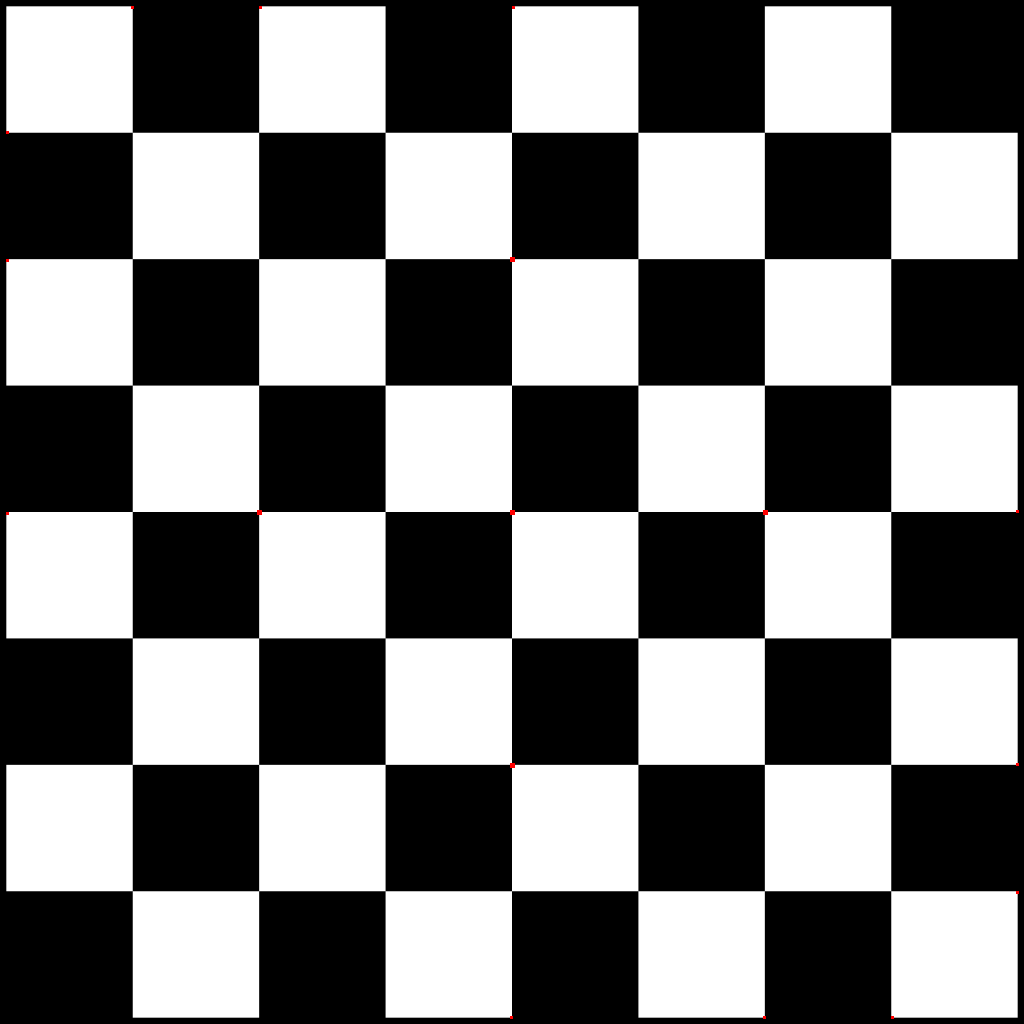

In [23]:
## 1 (e) ##


from google.colab.patches import cv2_imshow

image = cv2.imread('Chess_Board.jpg',)

b,g,r = cv2.split(image)
img = cv2.merge((b,g,r))


gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
# cv2_imshow(dst)
cv2_imshow(img)

if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

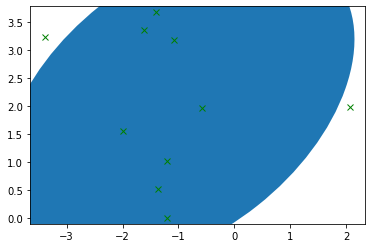

In [10]:
## 2 (a) ##

from matplotlib.patches import Ellipse

def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):

    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()
    ax = plt.gca()
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    x, y = np.random.multivariate_normal(pos, cov, 10).T
    plt.plot(x, y, 'x', color='green')
    plt.axis('equal')
    # plt.show()

    ax.add_artist(ellip)
    return x, y

pos = np.array([-1, 2])
cov = np.array([[2.48, 0.94], [0.94, 2.04]])
plt.show(plot_cov_ellipse(cov, pos ))
    

Estimated mean = 
 [-0.76778452  1.21023291] 
 Estimated cov = 
 [[1.22721191 0.59969117]
 [0.59969117 2.73181863]] 
 

cov diff = 1.5098712595146906 
 mean dif = 0.823198689975034
Match rate is = 
2.95736730348509


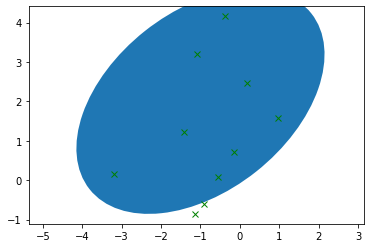

In [18]:
## 2 (b) ##


from matplotlib.patches import Ellipse

def plot_cov_ellipse(cov, pos, nstd=2, num_of_samples=10, ax=None, **kwargs):

    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()
    ax = plt.gca()
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    #Taking 10 samples, randomly
    x, y = np.random.multivariate_normal(pos, cov, num_of_samples).T
    # print(np.cov(x,y))

    a = np.array([x, y]) #Saving the samples

    # Getting the extimated mean and cov
    new_mean = a.mean(axis = 1)
    new_cov = np.cov(x,y)
    print('Estimated mean = \n {} \n Estimated cov = \n {} \n \n'.format(a.mean(axis = 1),np.cov(x,y)))

    #Calculating match rate
    cov_diff = np.linalg.norm(cov - new_cov)
    mean_diff = np.linalg.norm([pos -new_mean])
    print('cov diff = {} \n mean dif = {}'.format(cov_diff,mean_diff))
    #Calculating match rate and printing it
    diff = np.absolute(cov_diff * cov_diff + mean_diff * mean_diff)

    print('Match rate is = ')
    print (diff)

    plt.plot(x, y, 'x', color='green')
    plt.axis('equal')
    # plt.show()

    ax.add_artist(ellip)
    return ellip,new_mean,new_cov

pos = np.array([-1, 2])
cov = np.array([[2.48, 0.94], [0.94, 2.04]])
plot,_,_ = plot_cov_ellipse(cov, pos ,num_of_samples = 10)
plt.show(plot)
    

Estimated mean = 
 [-1.23479688  2.5294135 ] 
 Estimated cov = 
 [[1.09091055 0.01480432]
 [0.01480432 1.41159897]] 
 

cov diff = 2.0090872177354218 
 mean dif = 0.5791443974364467
Match rate is = 
4.371839681549883


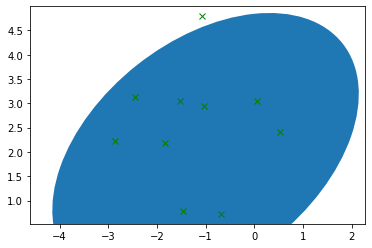

NameError: ignored

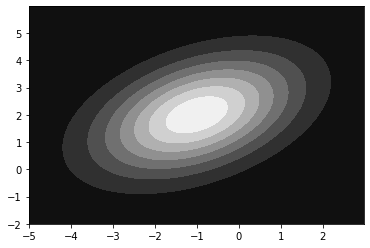

In [24]:
## 2 (c) ##

cov = np.array([[2.48, 0.94], [0.94, 2.04]])
mean = np.array([-1, 2])
gfactor = 4

x, y = np.mgrid[-5:3:.02, -2:6:.02]
# x, y = np.mgrid[mean[0] - g: mean[0] + g + 1: 0.01, mean[1] - g: mean[1] + g + 1: 0.01]
grid = np.dstack((x, y))


    # given distribution
rvPdf = multivariate_normal.pdf(mean=mean, cov=cov, x=grid)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rvPdf)

    # Getting the extimated mean and cov

new_mean = a.mean(axis = 1) # 'a' is the array of 10 original samples
new_cov = np.cov(x,y)
print('Estimated mean = \n {} \n Estimated cov = \n {} \n \n'.format(a.mean(axis = 1),np.cov(x,y)))

new_rvPdf = multivariate_normal.pdf(mean=new_mean, cov=new_cov, x=grid)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, new_rvPdf)

    # difference
diff_pdf = np.absolute(new_rvPdf - rvPdf)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, diff_pdf)

plt.show()

sampels: 10,	diff: 2.7087779144957373
sampels: 2000,	diff: 0.015441767841772765
sampels: 10000,	diff: 0.0025343026586705734


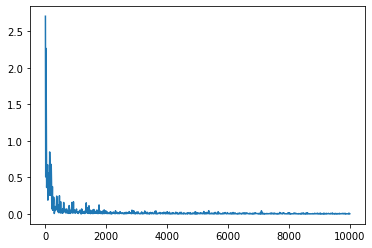

In [6]:
   ## 2 (d) ##

   
num_of_samples = 10000  # number of samples

cov = np.array([[2.48, 0.94], [0.94, 2.04]])
mean = np.array([-1, 2])

x, y = [], []
for level in range(10, num_of_samples + 1, 10):
    samples_x, samples_y = np.random.multivariate_normal(mean, cov, level).T
    samples = np.array([samples_x, samples_y])
    new_cov = np.cov(samples_x, samples_y)
    new_mean = samples.mean(axis = 1)

        # L = |new_mean-mean|^2 + |new_cov-cov|^2
    cov_diff = np.linalg.norm(cov - new_cov)
    mean_diff = np.linalg.norm([mean -new_mean])

        #Calculating match rate and printing it
    diff = np.absolute(cov_diff * cov_diff + mean_diff * mean_diff)

    x.append(level)
    y.append(diff)

print(f"sampels: 10,\tdiff: {y[0]}")
print(f"sampels: 2000,\tdiff: {y[99]}")
print(f"sampels: 10000,\tdiff: {y[999]}")
plt.plot(x, y)
plt.show()  





Original image


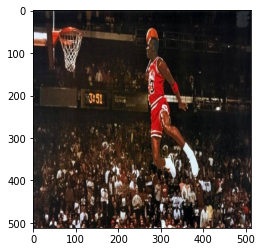




Below- Upper level Gaussian Pyramid


Level 5 of Laplacian Pyramid


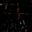




Level 4 of Laplacian Pyramid


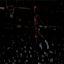




Level 3 of Laplacian Pyramid


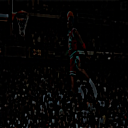




Level 2 of Laplacian Pyramid


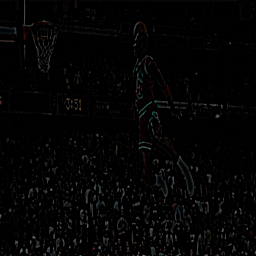




Level 1 of Laplacian Pyramid


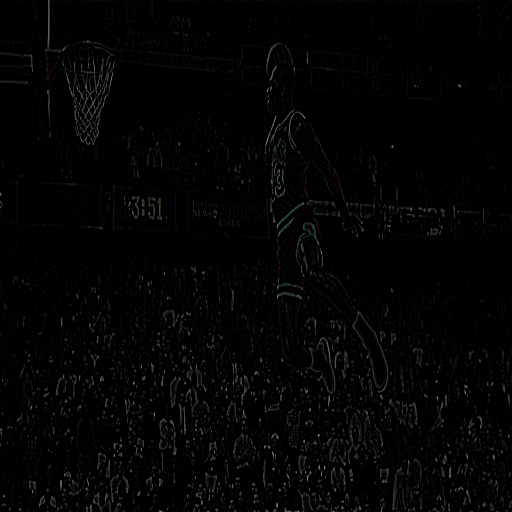

In [7]:
## 3 (a) ##

from google.colab.patches import cv2_imshow

levels = 6

Image = cv2.imread('jordan.jpg')
print('Original image')
Image = cv2.resize(Image, (512, 512))
b,g,r = cv2.split(Image)
img = cv2.merge((r,g,b))
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

# generate Gaussian pyramid for A
ImageG = Image.copy()
gpA = [ImageG]
for i in range(levels):
    ImageG = cv2.pyrDown(ImageG)
    gpA.append(ImageG)


# generate Laplacian Pyramid for A
layer = gpA[levels]
print('\n\n\nBelow- Upper level Gaussian Pyramid')
cv2_imshow(layer)
lpImage = [layer]

for i in range(levels-1,0,-1):
    GaussianExtended = cv2.pyrUp(gpA[i])
    Laplacian = cv2.subtract(gpA[i-1],GaussianExtended)
    lpImage.append(layer)
    print(f'Level {i} of Laplacian Pyramid')
    cv2_imshow(Laplacian)
    print('\n\n')








Image a


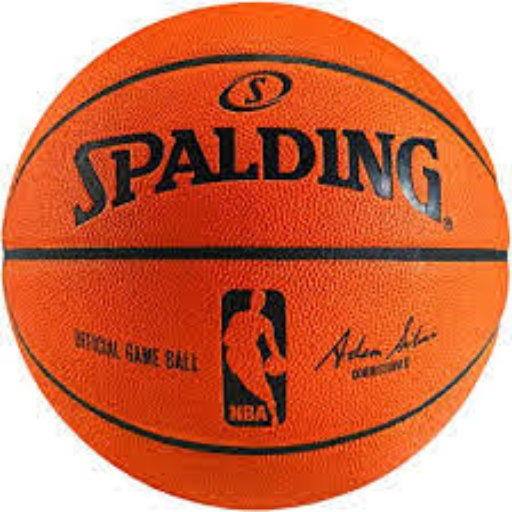


Image b


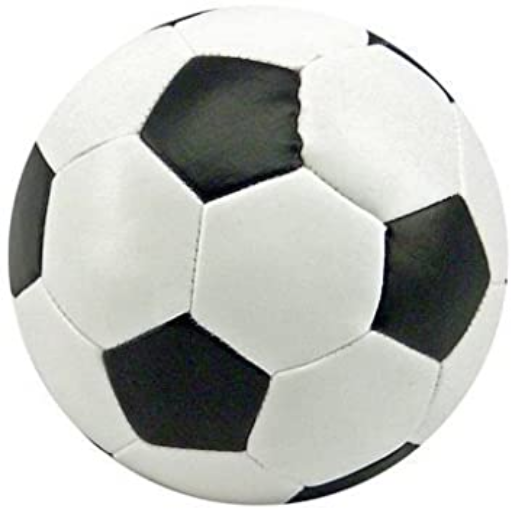


Mix


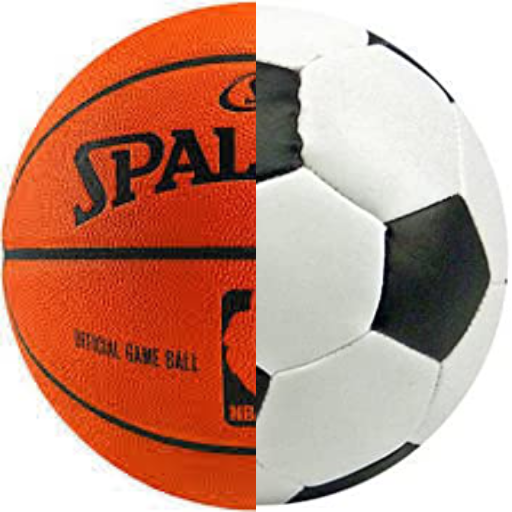


Mix reconstruct


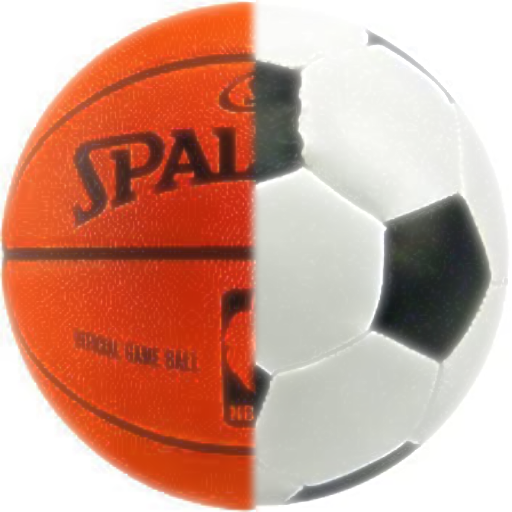

In [29]:
## 3 (b) ##

levels = 4  # number of levels

    # Read both images
img_a = cv2.imread('bbball.jpg')
img_b = cv2.imread('fffball.jpg')
img_a = cv2.resize(img_a, (512, 512))
img_b = cv2.resize(img_b, (512, 512))

    # # Image with direct connecting each half
img_a_cols, apple_rows, ch = img_a.shape
img_b_cols, orange_rows, ch = img_b.shape
img_mix = np.hstack((img_a[:, :int(img_a_cols / 2)], img_b[:, int(img_b_cols / 2):]))

    # Generate Gaussian pyramid for image A
img_a_copy = img_a.copy()
gp_img_a = [img_a_copy]
for i in range(levels):
    img_a_copy = cv2.pyrDown(img_a_copy)
    gp_img_a.append(img_a_copy)

    # Generate Gaussian pyramid for image B
    img_b_copy = img_b.copy()
gp_img_b = [img_b_copy]
for i in range(levels):
    img_b_copy = cv2.pyrDown(img_b_copy)
    gp_img_b.append(img_b_copy)

    # Generate Laplacian Pyramid for image A
img_a_copy = gp_img_a[levels - 1]
lp_img_a = [img_a_copy]
for i in range(levels - 1, 0, -1):
    gaussian_expanded = cv2.pyrUp(gp_img_a[i])
    laplacian = cv2.subtract(gp_img_a[i - 1], gaussian_expanded)
    lp_img_a.append(laplacian)

    # Generate Laplacian Pyramid for image B
img_b_copy = gp_img_b[levels - 1]
lp_img_b = [img_b_copy]
for i in range(levels - 1, 0, -1):
    gaussian_expanded = cv2.pyrUp(gp_img_b[i])
    laplacian = cv2.subtract(gp_img_b[i - 1], gaussian_expanded)
    lp_img_b.append(laplacian)

    # Add left and right halves of images in each level
img_a_b_pyramid = []
n = 0
for img_a_lap, img_b_lap in zip(lp_img_a, lp_img_b):
    n += 1
    cols, rows, ch = img_a_lap.shape
    laplacian = np.hstack((img_a_lap[:, 0:int(cols / 2)], img_b_lap[:, int(cols / 2):]))
    img_a_b_pyramid.append(laplacian)

    # Reconstruct
img_mix_reconstruct = img_a_b_pyramid[0]
for i in range(1, levels):
    img_mix_reconstruct = cv2.pyrUp(img_mix_reconstruct)
    img_mix_reconstruct = cv2.add(img_a_b_pyramid[i], img_mix_reconstruct)

    # display images
print("\nImage a")
cv2_imshow(img_a)

print("\nImage b")
cv2_imshow(img_b)

print("\nMix")
cv2_imshow(img_mix)

print("\nMix reconstruct")
cv2_imshow(img_mix_reconstruct)






In [ ]:
from google.colab.patches import cv2_imshow

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5500  100  5500    0     0  69620      0 --:--:-- --:--:-- --:--:-- 70512


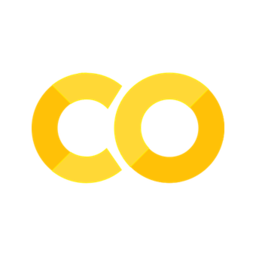

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)